In [37]:
from pyspark.sql import functions as F

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("scipy==1.7.1")
sc.install_pypi_package("seaborn==0.10.0")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
Package already installed for current Spark context!
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/context.py", line 1110, in install_pypi_package
    raise ValueError("Package already installed for current Spark context!")
ValueError: Package already installed for current Spark context!



In [127]:
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
input_bucket = 's3://project-yelp-review-sentiment-analysis/'
input_path = 'yelp_academic_dataset_review.json'
df = spark.read.json(input_bucket + input_path)
df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|   0|2014-02-05 20:30:30|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|   1|2015-01-04 00:01:03|    0|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|     1|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|   1|2017-01-14 20:54:15|    0|Sx8TMOWLNuJBWer-0...|  4.0|Cute inter

## Data Overview 

In [41]:
total_col = len(df.dtypes)
total_row = df.count()
print("Total columns = ", total_col) 
print("Total row = ", total_row)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total columns =  9
Total row =  6990280

In [42]:
#schema 
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [43]:
new_df = df.select("review_id", "text", "stars") 
new_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----+
|           review_id|                text|stars|
+--------------------+--------------------+-----+
|KU_O5udG6zpxOg-Vc...|If you decide to ...|  3.0|
|BiTunyQ73aT9WBnpR...|I've taken a lot ...|  5.0|
|saUsX_uimxRlCVr67...|Family diner. Had...|  3.0|
|AqPFMleE6RsU23_au...|Wow!  Yummy, diff...|  5.0|
|Sx8TMOWLNuJBWer-0...|Cute interior and...|  4.0|
+--------------------+--------------------+-----+
only showing top 5 rows

In [63]:
# binarize rating
#for review with star from 1 to 3 return 0 => negative sentinent, with star of 4 and 5 return 1 => positive sentinent
#binarize rating
from pyspark.ml.feature import Binarizer 
#def convert_rating(rating):
    #rating = int(rating)
    #if rating >=4: return 1
    #else: return 0'''' 
#this code did not work on my the second time I run this file so I use binarizer instead 
# apply to review raw data
binarizer = Binarizer(threshold = 3, inputCol = "stars", outputCol = "label")
review_df = binarizer.transform(new_df).drop('stars')

review_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----+
|           review_id|                text|label|
+--------------------+--------------------+-----+
|KU_O5udG6zpxOg-Vc...|If you decide to ...|  0.0|
|BiTunyQ73aT9WBnpR...|I've taken a lot ...|  1.0|
|saUsX_uimxRlCVr67...|Family diner. Had...|  0.0|
|AqPFMleE6RsU23_au...|Wow!  Yummy, diff...|  1.0|
|Sx8TMOWLNuJBWer-0...|Cute interior and...|  1.0|
+--------------------+--------------------+-----+
only showing top 5 rows

In [49]:
review_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
name 'review_df' is not defined
Traceback (most recent call last):
NameError: name 'review_df' is not defined



In [44]:
review_df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

6990280

# IDF, HASHINGTF, LOGISTIC REGESSRION

In [64]:
(train_set, val_set, test_set) = review_df.randomSplit([0.98, 0.01, 0.01], seed = 2000)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [65]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.ml.feature import HashingTF, IDF, Tokenizer, CountVectorizer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [66]:
tokenizer = Tokenizer(inputCol="text", outputCol="words")
words_tok = tokenizer.transform(review_df)

remover = StopWordsRemover(inputCol="words", outputCol="words_filtered")
filtered_words_df = remover.transform(words_tok)

filtered_words_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----+--------------------+--------------------+
|           review_id|                text|label|               words|      words_filtered|
+--------------------+--------------------+-----+--------------------+--------------------+
|KU_O5udG6zpxOg-Vc...|If you decide to ...|  0.0|[if, you, decide,...|[decide, eat, her...|
|BiTunyQ73aT9WBnpR...|I've taken a lot ...|  1.0|[i've, taken, a, ...|[taken, lot, spin...|
|saUsX_uimxRlCVr67...|Family diner. Had...|  0.0|[family, diner., ...|[family, diner., ...|
|AqPFMleE6RsU23_au...|Wow!  Yummy, diff...|  1.0|[wow!, , yummy,, ...|[wow!, , yummy,, ...|
|Sx8TMOWLNuJBWer-0...|Cute interior and...|  1.0|[cute, interior, ...|[cute, interior, ...|
+--------------------+--------------------+-----+--------------------+--------------------+
only showing top 5 rows

In [67]:
hashtf = HashingTF(numFeatures=2**16, inputCol="words", outputCol='tf')
idf = IDF(inputCol='tf', outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
label_stringIdx = StringIndexer(inputCol = "label", outputCol = "sentinent")
pipeline = Pipeline(stages=[tokenizer, hashtf, idf, label_stringIdx])

pipelineFit = pipeline.fit(train_set)
train_df = pipelineFit.transform(train_set)
val_df = pipelineFit.transform(val_set)
train_df.show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----+--------------------+--------------------+--------------------+---------+
|           review_id|                text|label|               words|                  tf|            features|sentinent|
+--------------------+--------------------+-----+--------------------+--------------------+--------------------+---------+
|--0HN389rkL6zLzqU...|I've been curious...|  0.0|[i've, been, curi...|(65536,[14,308,32...|(65536,[14,308,32...|      1.0|
|--2z5bwg3PPrWnr9w...|This place is loc...|  1.0|[this, place, is,...|(65536,[14,1028,3...|(65536,[14,1028,3...|      0.0|
|--46suwqJVAnei8ng...|I'm giving this W...|  0.0|[i'm, giving, thi...|(65536,[2245,2520...|(65536,[2245,2520...|      1.0|
|--4LY9ofH7f6_SJyN...|Cousin's is the p...|  0.0|[cousin's, is, th...|(65536,[2406,3266...|(65536,[2406,3266...|      1.0|
|--7X039CDFw_E_4gm...|Very delicious fo...|  1.0|[very, delicious,...|(65536,[9052,1268...|(65536,[9052,1268...|      0.0|
+---------------

In [68]:

lr = LogisticRegression(maxIter=100)
lrModel = lr.fit(train_df)
predictions = lrModel.transform(val_df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [51]:

evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(predictions)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.9644837130084154

In [69]:
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(val_set.count())
accuracy

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.9191343800541012

# CountVectorizer + IDF + Logistic Regression

In [71]:

cv = CountVectorizer(vocabSize=2**16, inputCol="words", outputCol='cv')
idf = IDF(inputCol='cv', outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
lr = LogisticRegression(maxIter=100)
pipeline = Pipeline(stages=[tokenizer, cv, idf,label_stringIdx, lr])

pipelineFit = pipeline.fit(train_set)
predictions = pipelineFit.transform(val_set)
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(val_set.count())
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
roc_auc = evaluator.evaluate(predictions)

print("Accuracy Score: {0:.4f}".format(accuracy))
print("ROC-AUC: {0:.4f}".format(roc_auc))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy Score: 0.9232
ROC-AUC: 0.9675

# Topic Modeling

In [78]:
#count vectorization create an index for each word and count how many times a word occured in total 
cv = CountVectorizer(vocabSize=2**16, inputCol="words", outputCol='cv')

cv_model = cv.fit(filtered_words_df) 
vectorize_token = cv_model.transform(filtered_words_df) 
idf = IDF(inputCol='cv', outputCol="features", minDocFreq=5)
idf_model = idf.fit(vectorize_token)
tfidf_result = idf_model.transform(vectorize_token)
tfidf_result.show(5) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
|           review_id|                text|label|               words|      words_filtered|                  cv|            features|
+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
|KU_O5udG6zpxOg-Vc...|If you decide to ...|  0.0|[if, you, decide,...|[decide, eat, her...|(65536,[0,1,2,3,4...|(65536,[0,1,2,3,4...|
|BiTunyQ73aT9WBnpR...|I've taken a lot ...|  1.0|[i've, taken, a, ...|[taken, lot, spin...|(65536,[0,1,2,3,4...|(65536,[0,1,2,3,4...|
|saUsX_uimxRlCVr67...|Family diner. Had...|  0.0|[family, diner., ...|[family, diner., ...|(65536,[0,4,5,7,9...|(65536,[0,4,5,7,9...|
|AqPFMleE6RsU23_au...|Wow!  Yummy, diff...|  1.0|[wow!, , yummy,, ...|[wow!, , yummy,, ...|(65536,[0,1,2,7,8...|(65536,[0,1,2,7,8...|
|Sx8TMOWLNuJBWer-0...|Cute interior and...|  1.0|[cute, interi

In [80]:
from pyspark.ml.clustering import LDA 
num_topics = 6
max_iter = 10

lda = LDA(k=num_topics, maxIter=max_iter, featuresCol='features')
lda_model = lda.fit(tfidf_result)
     

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [84]:
from pyspark.sql import types as T
vocab = cv_model.vocabulary

def get_words(token_list):
     return [vocab[token_id] for token_id in token_list]
       
udf_to_words = F.udf(get_words, T.ArrayType(T.StringType()))
     

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [85]:
num_top_words = 10

topics = lda_model.describeTopics(num_top_words).withColumn('topicWords', udf_to_words(F.col('termIndices')))
topics.select('topic', 'topicWords').show(truncate=90)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------------------------------------------+
|topic|                                  topicWords|
+-----+--------------------------------------------+
|    0|[, we, was, were, it, i, had, our, with, of]|
|    1|   [, he, i, my, me, to, we, was, they, she]|
|    2| [, great, is, we, my, i, you, was, of, are]|
|    3|[, i, we, to, that, she, not, they, was, he]|
|    4| [, you, i, is, that, to, of, are, have, in]|
|    5| [, is, you, of, are, i, but, it, was, food]|
+-----+--------------------------------------------+

# Data Visualization 

In [86]:
filtered_words_df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----+--------------------+--------------------+
|           review_id|                text|label|               words|      words_filtered|
+--------------------+--------------------+-----+--------------------+--------------------+
|KU_O5udG6zpxOg-Vc...|If you decide to ...|  0.0|[if, you, decide,...|[decide, eat, her...|
|BiTunyQ73aT9WBnpR...|I've taken a lot ...|  1.0|[i've, taken, a, ...|[taken, lot, spin...|
|saUsX_uimxRlCVr67...|Family diner. Had...|  0.0|[family, diner., ...|[family, diner., ...|
|AqPFMleE6RsU23_au...|Wow!  Yummy, diff...|  1.0|[wow!, , yummy,, ...|[wow!, , yummy,, ...|
|Sx8TMOWLNuJBWer-0...|Cute interior and...|  1.0|[cute, interior, ...|[cute, interior, ...|
+--------------------+--------------------+-----+--------------------+--------------------+
only showing top 5 rows

In [94]:
from pyspark.sql.functions import count, col
ords_df=filtered_words_df.groupBy("label")
new_df = ords_df.count() 
new_df.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-------+
|label|  count|
+-----+-------+
|  1.0|4684545|
|  0.0|2305735|
+-----+-------+

In [139]:
pie = new_df.toPandas()
pie

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   label    count
0    1.0  4684545
1    0.0  2305735

In [143]:
pie1 = pie.replace({'label' : {0.0 : 'Negative', 1.0 : 'Positive'}})
pie1

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

      label    count
0  Positive  4684545
1  Negative  2305735

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

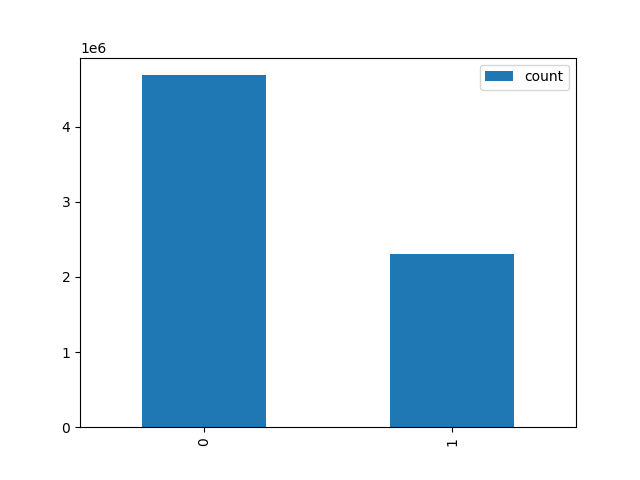

In [144]:
pie1.plot(kind='bar')
%matplot plt

In [162]:
bus=spark.read.json('s3://project-yelp-review-sentiment-analysis/yelp_academic_dataset_business.json')
bus.show(5)

VBox()

An error was encountered:
Session 0 unexpectedly reached final status 'error'. See logs:
stdout: 

stderr: 
22/12/10 01:42:37 INFO ExecutorAllocationManager: Requesting 1 new executor because tasks are backlogged (new desired total will be 1)
22/12/10 01:42:38 INFO ExecutorAllocationManager: Requesting 2 new executors because tasks are backlogged (new desired total will be 3)
22/12/10 01:42:39 INFO ExecutorAllocationManager: Requesting 4 new executors because tasks are backlogged (new desired total will be 7)
22/12/10 01:42:40 INFO YarnSchedulerBackend$YarnDriverEndpoint: Registered executor NettyRpcEndpointRef(spark-client://Executor) (172.31.15.141:42512) with ID 34
22/12/10 01:42:40 INFO ExecutorAllocationManager: New executor 34 has registered (new total is 1)
22/12/10 01:42:40 INFO TaskSetManager: Starting task 0.0 in stage 723.0 (TID 14940, ip-172-31-15-141.us-east-2.compute.internal, executor 34, partition 0, RACK_LOCAL, 8592 bytes)
22/12/10 01:42:40 INFO TaskSetManager: Startin

In [138]:
bus.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [160]:
star=bus.groupby(bus["stars"])

VBox()

An error was encountered:
Session 0 unexpectedly reached final status 'error'. See logs:
stdout: 

stderr: 
22/12/10 01:42:37 INFO ExecutorAllocationManager: Requesting 1 new executor because tasks are backlogged (new desired total will be 1)
22/12/10 01:42:38 INFO ExecutorAllocationManager: Requesting 2 new executors because tasks are backlogged (new desired total will be 3)
22/12/10 01:42:39 INFO ExecutorAllocationManager: Requesting 4 new executors because tasks are backlogged (new desired total will be 7)
22/12/10 01:42:40 INFO YarnSchedulerBackend$YarnDriverEndpoint: Registered executor NettyRpcEndpointRef(spark-client://Executor) (172.31.15.141:42512) with ID 34
22/12/10 01:42:40 INFO ExecutorAllocationManager: New executor 34 has registered (new total is 1)
22/12/10 01:42:40 INFO TaskSetManager: Starting task 0.0 in stage 723.0 (TID 14940, ip-172-31-15-141.us-east-2.compute.internal, executor 34, partition 0, RACK_LOCAL, 8592 bytes)
22/12/10 01:42:40 INFO TaskSetManager: Startin

In [163]:
dt = bus.select("business_id", "categories")
business_category = dt.withColumn('category',explode(split('categories',", ")))

business_category= business_category.drop("categories")
business_category.show(5)

VBox()

An error was encountered:
Session 0 unexpectedly reached final status 'error'. See logs:
stdout: 

stderr: 
22/12/10 01:42:37 INFO ExecutorAllocationManager: Requesting 1 new executor because tasks are backlogged (new desired total will be 1)
22/12/10 01:42:38 INFO ExecutorAllocationManager: Requesting 2 new executors because tasks are backlogged (new desired total will be 3)
22/12/10 01:42:39 INFO ExecutorAllocationManager: Requesting 4 new executors because tasks are backlogged (new desired total will be 7)
22/12/10 01:42:40 INFO YarnSchedulerBackend$YarnDriverEndpoint: Registered executor NettyRpcEndpointRef(spark-client://Executor) (172.31.15.141:42512) with ID 34
22/12/10 01:42:40 INFO ExecutorAllocationManager: New executor 34 has registered (new total is 1)
22/12/10 01:42:40 INFO TaskSetManager: Starting task 0.0 in stage 723.0 (TID 14940, ip-172-31-15-141.us-east-2.compute.internal, executor 34, partition 0, RACK_LOCAL, 8592 bytes)
22/12/10 01:42:40 INFO TaskSetManager: Startin